# 1. Manual

In [1]:
import numpy as np
from PIL import Image as PImage
import cv2
from IPython.display import Image, display
from ipywidgets import widgets

In [2]:
def cv2pil(image):
    ''' OpenCV型 -> PIL型 '''
    new_image = image.copy()
    if new_image.ndim == 2:  # モノクロ
        new_image = PImage.fromarray(new_image).convert('P')
    elif new_image.shape[2] == 3:  # カラー
        new_image = cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB)
        new_image = PImage.fromarray(new_image)
    elif new_image.shape[2] == 4:  # 透過
        new_image = cv2.cvtColor(new_image, cv2.COLOR_BGRA2RGBA)
        new_image = PImage.fromarray(new_image)
    return new_image

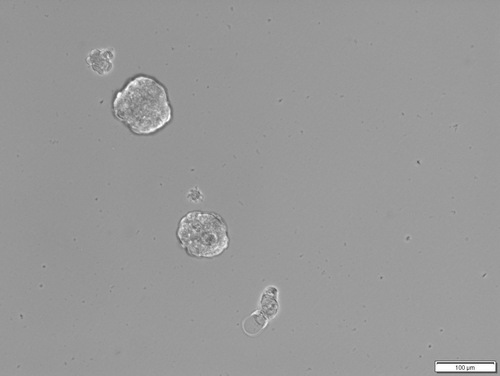

In [3]:
path = './image/cell_image_4.jpg'
pil_img = PImage.open(path)
pil_img

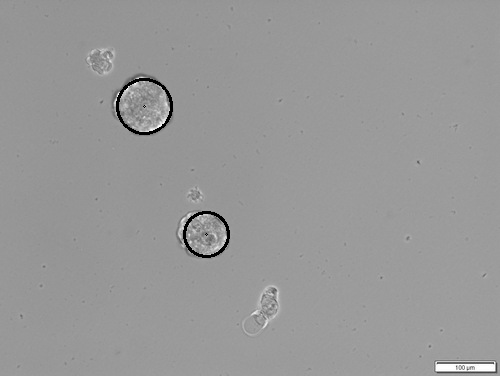

In [4]:
img = cv2.imread(path, 0)
circles = cv2.HoughCircles(img, cv2.HOUGH_GRADIENT, dp=1, minDist=30, param1=30, param2=30, minRadius=20, maxRadius=100)
circles = np.uint16(np.around(circles))[0]
for circle in circles:
    # 円周を描画する
    cv2.circle(img, (circle[0], circle[1]), circle[2], (0, 165, 255), 2)
    # 中心点を描画する
    cv2.circle(img, (circle[0], circle[1]), 1, (0, 0, 255), 1)
cv2pil(img)

# 2. GUI

In [5]:
def imshow(img):
    """画像を Notebook 上に表示する。
    """
    ret, encoded = cv2.imencode(".png", img)
    display(Image(encoded))

In [6]:
def hough_circle(img, dp, minDist, param1, param2, radius):
    """ハフ変換で円検出を行い、結果を表示する。
    """
    minRadius, maxRadius = radius

    # グレースケールに変換する。
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # ハフ変換で円検出する。
    circles = cv2.HoughCircles(
        gray,
        cv2.HOUGH_GRADIENT,
        dp=dp,
        minDist=minDist,
        param1=param1,
        param2=param2,
        minRadius=minRadius,
        maxRadius=maxRadius,
    )

    # 検出した円を描画する。
    copied = img.copy()

    if circles is not None:
        for cx, cy, r in circles.squeeze(axis=0).astype(int):
            # 円の円周を描画する。
            cv2.circle(copied, (cx, cy), r, (0, 255, 0), 2)
            # 円の中心を描画する。
            cv2.circle(copied, (cx, cy), 2, (0, 255, 0), 2)

    imshow(copied)

In [7]:
# パラメータ「dp」を設定するスライダー
dp_slider = widgets.FloatSlider(
    min=0.1, max=10.0, step=0.1, value=1.0, description="dp: "
)
dp_slider.layout.width = "400px"

# パラメータ「minDist」を設定するスライダー
min_dist_slider = widgets.IntSlider(
    min=1, max=500, step=10, value=10, description="minDist: "
)
min_dist_slider.layout.width = "400px"

# パラメータ「param1」を設定するスライダー
param1_slider = widgets.IntSlider(
    min=1, max=300, value=16, step=1, description="param1:"
)
param1_slider.layout.width = "400px"

# パラメータ「param2」を設定するスライダー
param2_slider = widgets.IntSlider(
    min=1, max=300, value=44, step=1, description="param2:"
)
param2_slider.layout.width = "400px"

# パラメータ「radius」を設定するスライダー
radius_slider = widgets.IntRangeSlider(
    min=0, max=500, value=[20, 100], step=1, description="radius:"
)
radius_slider.layout.width = "400px"

# 画像を読み込む。
img = cv2.imread('./image/cell_image_4.jpg')

# ウィジェットを表示する。
widgets.interactive(
    hough_circle,
    img=widgets.fixed(img),
    dp=dp_slider,
    minDist=min_dist_slider,
    param1=param1_slider,
    param2=param2_slider,
    radius=radius_slider,
)

interactive(children=(FloatSlider(value=1.0, description='dp: ', layout=Layout(width='400px'), max=10.0, min=0…